In [2]:
import numpy as np 
import scipy
import matplotlib.pyplot as plt
import pandas as pd

from neural_tuning import generate_tuning_curves, generate_spikes, plot_raster
%matplotlib inline
np.random.seed(1000)

In [3]:
tuning_data = scipy.io.loadmat('../datafiles/direction/tuning.mat')
tuning_data = np.array(tuning_data['tuningMat'])

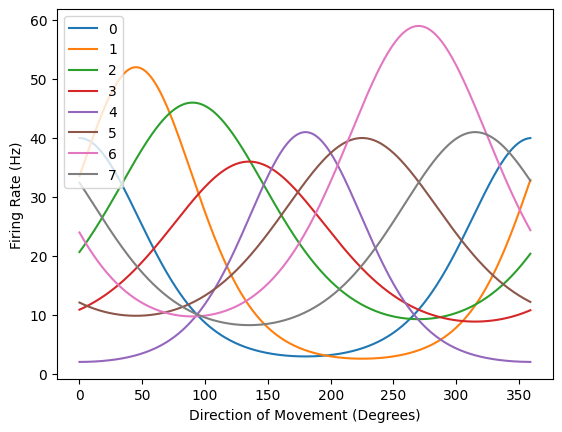

In [4]:
for n in range(tuning_data.shape[0]):
    plt.plot(tuning_data[n], label = n)

plt.xlabel('Direction of Movement (Degrees)')
plt.ylabel('Firing Rate (Hz)')
plt.legend()
plt.show()

In [5]:
tuning_curves = generate_tuning_curves(tuning_data[1], 50)
print(tuning_curves.shape)
n_units = tuning_curves.shape[0]

(50, 360)


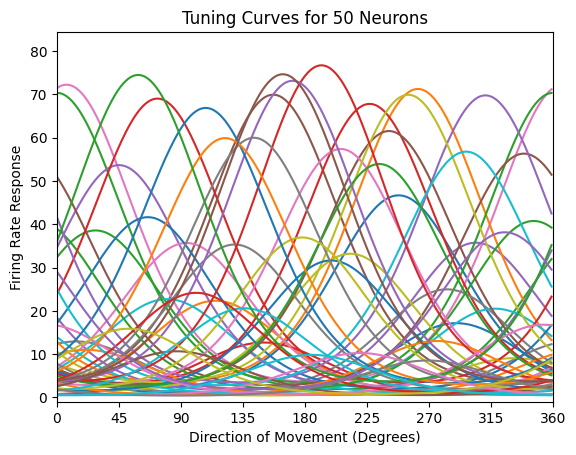

In [6]:
for n in range(n_units):
    plt.plot(tuning_curves[n])

plt.title('Tuning Curves for {} Neurons'.format(int(n_units)))
plt.xlabel('Direction of Movement (Degrees)')
plt.ylabel('Firing Rate Response')
plt.xlim([0, 360])
plt.ylim([-1, np.max(tuning_curves)*1.1])
plt.xticks([0, 45, 90, 135, 180, 225, 270, 315, 360])
plt.show()

In [8]:
df = pd.read_csv('../datafiles/direction/training/fortyfive_degrees.csv', 
                 index_col=False)
df.head(15)

,dt,x,z,vx,vz
0,1.663708e+09,-5.745112,-6.163695,-3.453197e-09,-3.704793e-09
1,8.819000e-03,-5.736274,-6.265648,1.002174e+00,-1.156067e+01
2,9.113000e-03,-5.623017,-6.484231,1.242806e+01,-2.398586e+01
3,9.006000e-03,-5.617822,-6.511279,5.769063e-01,-3.003290e+00
4,9.252000e-03,-5.598355,-6.704412,2.104072e+00,-2.087467e+01
5,8.831000e-03,-5.593398,-6.968569,5.613406e-01,-2.991256e+01
6,9.012000e-03,-5.643433,-7.356688,-5.552095e+00,-4.306688e+01
7,9.044000e-03,-5.672482,-7.688872,-3.212008e+00,-3.672980e+01
8,9.268000e-03,-5.379499,-8.167252,3.161238e+01,-5.161623e+01
9,8.848000e-03,-5.123849,-8.651246,2.889354e+01,-5.470100e+01


In [9]:
df = df.drop(
    labels=0,
    axis=0,
    inplace=False
)
df.head(15)

,dt,x,z,vx,vz
1,0.008819,-5.736274,-6.265648,1.002174,-11.560665
2,0.009113,-5.623017,-6.484231,12.428062,-23.985857
3,0.009006,-5.617822,-6.511279,0.576906,-3.003290
4,0.009252,-5.598355,-6.704412,2.104072,-20.874666
5,0.008831,-5.593398,-6.968569,0.561341,-29.912556
6,0.009012,-5.643433,-7.356688,-5.552095,-43.066883
7,0.009044,-5.672482,-7.688872,-3.212008,-36.729801
8,0.009268,-5.379499,-8.167252,31.612381,-51.616234
9,0.008848,-5.123849,-8.651246,28.893539,-54.701000
10,0.009049,-4.823052,-9.174445,33.240856,-57.818439


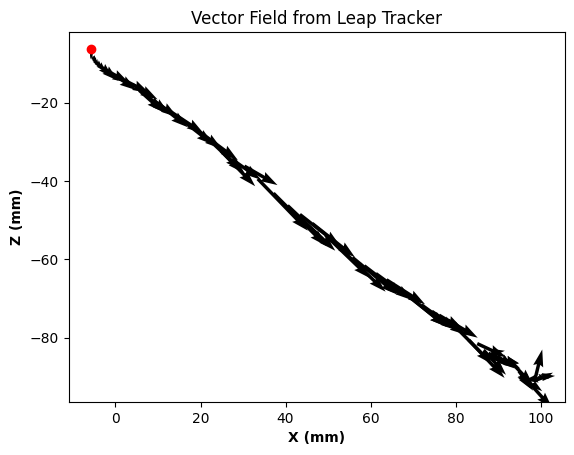

In [10]:
dt = np.array(df.dt).reshape(-1,1)
x = np.array(df.x).reshape(-1,1)
z = np.array(df.z).reshape(-1,1)
vx = np.array(df.vx).reshape(-1,1)
vz = np.array(df.vz).reshape(-1,1)

plt.plot(x[0], z[0], marker='o', color='red')
plt.quiver(x, z, vx, vz)
plt.xlabel('X (mm)', fontweight='bold')
plt.ylabel('Z (mm)', fontweight='bold')
plt.title('Vector Field from Leap Tracker')
plt.show()

In [11]:
spikes_array = np.zeros((n_units, dt.shape[0]))
time = np.zeros((dt.shape))

for n in range(dt.shape[0]):
    spikes = generate_spikes(tuning_curves, dt[n], vx[n], vz[n])
    spikes_array[:,n] = spikes[:,0]
    if n > 0:
        time[n] = time[n-1] + dt[n]

smoothed_spikes = scipy.ndimage.gaussian_filter1d(spikes_array, 3.0, axis=1)

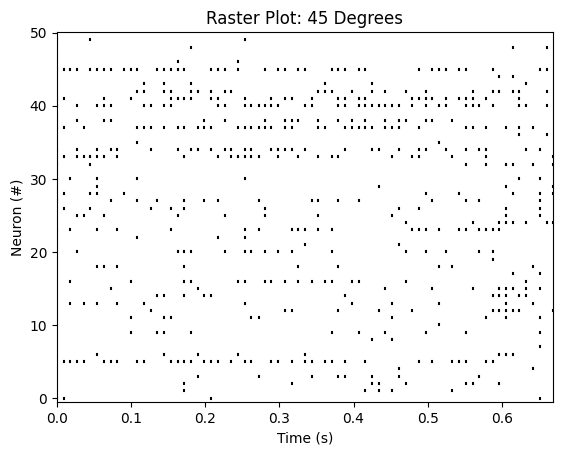

In [14]:
plot_raster(time, spikes_array, '45 Degrees')

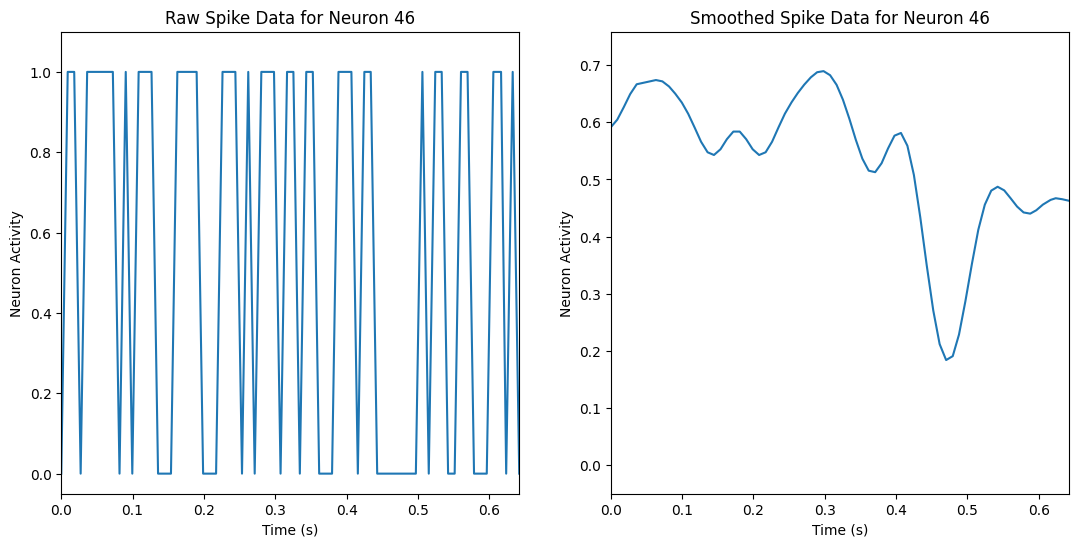

In [126]:
n = 45
fig = plt.figure(figsize=(13,6))

ax1 = fig.add_subplot(121)
ax1.plot(time, spikes_array[n,:])
ax1.set_xlim([0, time[-1]])
ax1.set_ylim([-0.05, 1.1])
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Neuron Activity')
ax1.set_title('Raw Spike Data for Neuron {}'.format(n+1))

ax2 = fig.add_subplot(122)
ax2.plot(time, smoothed_spikes[n,:])
ax2.set_xlim([0, time[-1]])
ax2.set_ylim([-0.05, np.max(smoothed_spikes[n,:])*1.1])
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Neuron Activity')
ax2.set_title('Smoothed Spike Data for Neuron {}'.format(n+1))

plt.show()